# Project 1 DD2432 Machine Learning, Advance


# Data Preprocessing
1. Load libraries
2. Load data
3. Drop duplicates
4. Remap 'legs'

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors

# improve plots
%config InlineBackend.figure_format = 'svg'
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.style.use('bmh')

In [2]:
parameters = ["hair","feathers","eggs","milk",
              "airborne", "aquatic", "predator", "toothed",
              "backbone","breathes","venomous","fins","legs",
              "tail","domestic","catsize"]
# load data
df =pd.read_csv('zoo.data', sep=',',header=None,index_col=0, names=parameters+['type'])

# remove duplicates based on index/animal name:
df = df.reset_index().drop_duplicates(subset='index', keep='last').set_index('index').sort_index()

# remove duplicates based on parameters, if wanted.
#df = df.drop_duplicates(subset=parameters, keep='last')

In [3]:
# remapping 'legs'
legs_remap = {0:0, 2:1, 4:2, 5:0, 6:3, 8:4} # mapping
df = df.replace({"legs": legs_remap})

In [4]:
# Standardize the data
from sklearn.preprocessing import StandardScaler,normalize

x = df.loc[:, parameters].values # not including type
y = df.loc[:,['type']].values
# Standardizing the features

x = StandardScaler().fit_transform(x)
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,1.000000e+02,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,7.549517e-17,0.000000,2.131628e-16,1.931788e-16,-7.549517e-17,4.662937e-17,-1.687539e-16,2.664535e-17,7.549517e-17,-1.576517e-16,-7.660539e-17,-1.110223e-18,9.880985e-17,7.882583e-17,-1.099121e-16,3.774758e-17
std,1.005038e+00,1.005038,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-8.685540e-01,-0.500000,-1.175139e+00,-8.336158e-01,-5.619515e-01,-7.337994e-01,-1.105542e+00,-1.224745e+00,-2.134375e+00,-1.939563e+00,-2.948839e-01,-4.525696e-01,-1.364385e+00,-1.732051e+00,-3.865557e-01,-8.864053e-01
25%,-8.685540e-01,-0.500000,-1.175139e+00,-8.336158e-01,-5.619515e-01,-7.337994e-01,-1.105542e+00,-1.224745e+00,4.685213e-01,5.155800e-01,-2.948839e-01,-4.525696e-01,-3.828132e-01,5.551115e-17,-3.865557e-01,-8.864053e-01
50%,-8.685540e-01,-0.500000,8.509629e-01,-8.336158e-01,-5.619515e-01,-7.337994e-01,9.045340e-01,8.164966e-01,4.685213e-01,5.155800e-01,-2.948839e-01,-4.525696e-01,-3.828132e-01,5.773503e-01,-3.865557e-01,-8.864053e-01
75%,1.151339e+00,-0.500000,8.509629e-01,1.199593e+00,-5.619515e-01,1.362770e+00,9.045340e-01,8.164966e-01,4.685213e-01,5.155800e-01,-2.948839e-01,-4.525696e-01,5.987590e-01,5.773503e-01,-3.865557e-01,1.128152e+00
max,1.151339e+00,2.000000,8.509629e-01,1.199593e+00,1.779513e+00,1.362770e+00,9.045340e-01,8.164966e-01,4.685213e-01,5.155800e-01,3.391165e+00,2.209605e+00,2.561903e+00,5.773503e-01,2.586949e+00,1.128152e+00


# PCA
In this section PCA is performed on the data set (x,y)

In [68]:
# This is PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # at least two components needed for visualization.
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = [str('PC'+str(i)) for i in range(1,3)],index=df.index)
pcaDf = pd.concat([principalDf, df[['type']]], axis = 1)

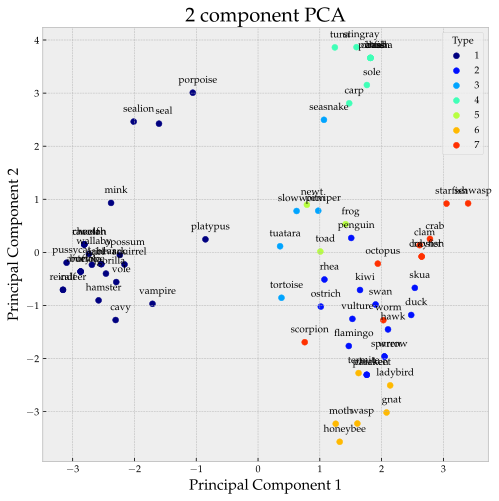

In [69]:
# All of this is just plotting the data
filt_df = pcaDf.drop_duplicates(subset=['PC1','PC2'], keep='last')

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

colormap = cm.jet
for typ in range(1,8):
    col = colormap(int(typ-1)/7)
    ax.scatter(filt_df[filt_df['type']==typ]['PC1'],filt_df[filt_df['type']==typ]['PC2'],color=col,label=typ)

for index,point in filt_df.iterrows():
    plt.annotate(index, # this is the text
                 (point['PC1'], point['PC2']), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(5,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
ax.legend(title="Type")
ax.grid(True)
plt.savefig('2ComponentPCA.pdf')

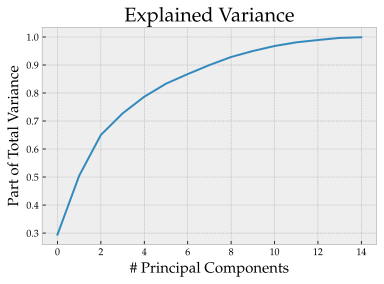

In [48]:
# The explained variance can be found in the pca object created before. This is all just plotting that.
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained Variance",fontsize = 20)
plt.xlabel("\# Principal Components",fontsize = 15)
plt.ylabel("Part of Total Variance",fontsize = 15)
pd.DataFrame(pca.components_[0:2],columns=df.columns[0:16],index = ['PC1','PC2'])
plt.savefig('ExplainedVariance.pdf')

In [91]:
PCA_comp = pd.DataFrame(pca.components_,columns=parameters, index=['PC1','PC2'])
print("PC1 max abs value: "+str(PCA_comp.loc[:,max(abs(PCA_comp.iloc[0]))==abs(PCA_comp.iloc[0])]))
print("PC2 max abs value: "+str(PCA_comp.loc[:,max(abs(PCA_comp.iloc[1]))==abs(PCA_comp.iloc[1])]))

PC1 max abs value:          milk
PC1 -0.442663
PC2  0.010423
PC2 max abs value:          fins
PC1  0.087381
PC2  0.450397


# MDS from Distance Matrix
Looking at the MDS for different distance matrixes. i.e. alternating p in the Minkowski distance function.

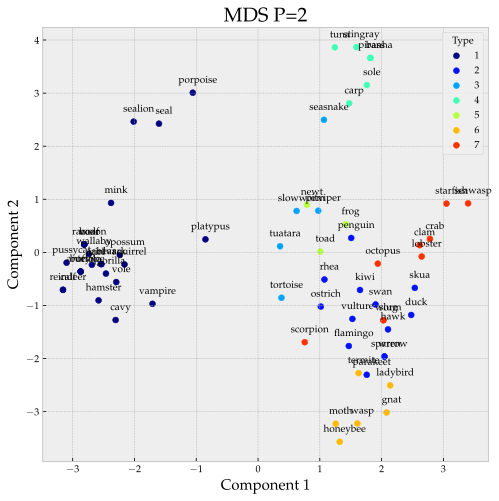

In [18]:
from scipy.spatial import distance_matrix
from sklearn.decomposition import TruncatedSVD
p = 2 # can vary
distanceDf = pd.DataFrame(distance_matrix(x, x, p=p), index=df.index, columns=df.index)
# Perform SVD
# from distance matrix: isomapDf.values 
D = np.square(distanceDf.values)
One_n = np.ones((len(D),len(D)))
n = len(D)
S = -1/2*(D-1/n*np.matmul(D,One_n)-1/n*np.matmul(One_n,D)+1/n**2*np.matmul(One_n,np.matmul(D,One_n)))

# perform SVD of S
svd = TruncatedSVD(n_components=2)
principalComponents = svd.fit_transform(S)
X_mds =np.matmul(np.sqrt(np.diag(svd.singular_values_)),svd.components_)
principalDf = pd.DataFrame(data = np.transpose(X_mds)
             , columns = ['PC1', 'PC2'],index=df.index)
mdsSvdDf = pd.concat([principalDf, df[['type']]], axis = 1)

# Remove duplicates so graph is readable
filt_df = mdsSvdDf.drop_duplicates(subset=['PC1','PC2'], keep='last') 

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('MDS P='+str(p), fontsize = 20)

for typ in range(1,8):
    col = colormap(int(typ-1)/7)
    ax.scatter(filt_df[filt_df['type']==typ]['PC1'],filt_df[filt_df['type']==typ]['PC2'],color=col,label=typ)

for index,point in filt_df.iterrows():
    plt.annotate(index, # this is the text
                 (point['PC1'], point['PC2']), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(5,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

ax.legend(title="Type")
plt.savefig('MDS P='+str(p)+'.pdf')

# Isomap
1. compute graph with k-nearest neighbour or set radius
2. compute distance matrix through alghoritm from graph (FloydWarshall for solving travelling salesman)
3. use MDS on the new distance matrix

In [9]:
def isomapMatrix(DistanceDf, k):
    
    K = np.full((len(distanceDf.index),len(distanceDf.index)),fill_value=9999)
    nearestGraph = pd.DataFrame(index=distanceDf.index, columns=['neighbors'])
    nearestGraph['neighbors'] = nearestGraph['neighbors'].astype('object')
    
    for i,animal in enumerate(nearestGraph.index):
        index_of_sorted = sorted(range(len(distanceDf[animal])), key = lambda sub: distanceDf[animal].values[sub])
        index_non_zero_d = [i for i in index_of_sorted if distanceDf[animal].values[i]!=0]
        all_j = index_non_zero_d[:k]
        for j in all_j:
            K[i,j]=distanceDf[animal].values[j]
        nearestGraph.at[animal, ['neighbors']] = [all_j]
    return(K)

In [10]:
# Solves all pair shortest path via Floyd Warshall Algorithm 
def floydWarshall(graph): 
    """ 
    Source:
    https://www.geeksforgeeks.org/floyd-warshall-algorithm-dp-16/
    # This code is contributed by Nikhil Kumar Singh(nickzuck_007) 
    Edited to fit Python 3+
    """
    INF=999
    V = len(graph[0])
    dist = list(map(lambda i : list(map(lambda j : j , i)) , graph))
    for k in range(V): 
        
        # pick all vertices as source one by one 
        for i in range(V): 
  
            # Pick all vertices as destination for the 
            # above picked source 
            for j in range(V): 
  
                # If vertex k is on the shortest path from  
                # i to j, then update the value of dist[i][j] 
                dist[i][j] = min(dist[i][j] , 
                                  dist[i][k]+ dist[k][j]) 
    return(dist)



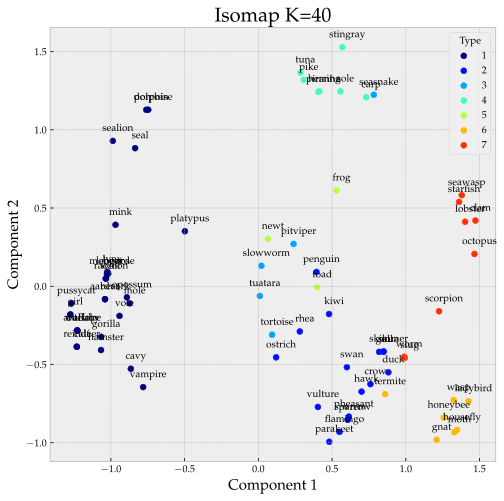

In [17]:
# Get Isomap
k=40
from scipy.spatial import distance_matrix
distanceDf = pd.DataFrame(distance_matrix(x, x, p=2), index=df.index, columns=df.index)
K = isomapMatrix(distanceDf,k)
isomap = floydWarshall(K)
isomapDf = pd.DataFrame(isomap, columns=distanceDf.index,index=distanceDf.index)

# Perform SVD
# from distance matrix: isomapDf.values 
D = isomapDf.values
One_n = np.ones((len(D),len(D)))
n = len(D)
S = -1/2*(D-1/n*np.matmul(D,One_n)-1/n*np.matmul(One_n,D)+1/n**2*np.matmul(One_n,np.matmul(D,One_n)))

# perform SVD of S
svd = TruncatedSVD(n_components=2)
principalComponents = svd.fit_transform(S)
X_mds =np.matmul(np.sqrt(np.diag(svd.singular_values_)),svd.components_)
principalDf = pd.DataFrame(data = np.transpose(X_mds)
             , columns = ['PC1', 'PC2'],index=df.index)
isoSvdDf = pd.concat([principalDf, df[['type']]], axis = 1)

# Remove duplicates so graph is readable
filt_df = isoSvdDf.drop_duplicates(subset=['PC1','PC2'], keep='last') 

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('Isomap K='+str(k), fontsize = 20)

colormap = cm.tab20b
colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 0.9,len(filt_df['type']))]

colormap = cm.jet
for typ in range(1,8):
    col = colormap(int(typ-1)/7)
    ax.scatter(filt_df[filt_df['type']==typ]['PC1'],filt_df[filt_df['type']==typ]['PC2'],color=col,label=typ)

for index,point in filt_df.iterrows():
    plt.annotate(index, # this is the text
                 (point['PC1'], point['PC2']), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(5,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

ax.legend(title="Type")
plt.savefig('ISOMAPK'+str(k)+'.pdf')